In [190]:
#Import de bibliothèques
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns;sns.set(font_scale=1.2)
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
import datetime
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  1- Importation et Preprocessing

In [4]:
df = pd.read_csv('base_finale.csv') 
df.head()

,POL_STATUS,P1_MAR_STATUS,PAYMENT_METHOD,AD_BUILDINGS,MAX_DAYS_UNOCC,RISK_RATED_AREA_C,HP1_ADDON_POST_REN,HP3_ADDON_POST_REN,SUM_INSURED_BUILDINGS,RISK_RATED_AREA_B,...,OWNERSHIP_TYPE,CLAIM3YEARS,SUM_INSURED_CONTENTS,NEIGH_WATCH,SEC_DISC_REQ,HP2_ADDON_PRE_REN,LISTED,HOME_EM_ADDON_POST_REN,AGE,MOIS_SOUSC
0,1,O,PureDD,Y,0,6.0,N,N,1000000,19.00000,...,8,N,50000,N,Y,N,3,N,68,6
1,0,M,PureDD,Y,0,9.0,N,N,1000000,25.00000,...,3,N,50000,N,N,N,3,N,37,5
2,0,S,PureDD,N,0,12.0,N,N,0,10.27444,...,8,N,50000,Y,Y,N,3,N,60,6
3,0,W,NonDD,N,0,14.0,N,N,0,10.27444,...,18,N,50000,N,Y,N,3,N,81,12
4,0,M,DD-Other,Y,0,10.0,N,N,1000000,5.00000,...,8,N,50000,N,Y,N,3,N,71,2


In [5]:
df.columns

Index(['POL_STATUS', 'P1_MAR_STATUS', 'PAYMENT_METHOD', 'AD_BUILDINGS',
       'MAX_DAYS_UNOCC', 'RISK_RATED_AREA_C', 'HP1_ADDON_POST_REN',
       'HP3_ADDON_POST_REN', 'SUM_INSURED_BUILDINGS', 'RISK_RATED_AREA_B',
       'COVER_START', 'LAST_ANN_PREM_GROSS', 'MTA_FLAG', 'P1_EMP_STATUS',
       'OCC_STATUS', 'GARDEN_ADDON_PRE_REN', 'YEARBUILT', 'BEDROOMS',
       'SUBSIDENCE', 'PROP_TYPE', 'P1_POLICY_REFUSED', 'KEYCARE_ADDON_PRE_REN',
       'SAFE_INSTALLED', 'OWNERSHIP_TYPE', 'CLAIM3YEARS',
       'SUM_INSURED_CONTENTS', 'NEIGH_WATCH', 'SEC_DISC_REQ',
       'HP2_ADDON_PRE_REN', 'LISTED', 'HOME_EM_ADDON_POST_REN', 'AGE',
       'MOIS_SOUSC'],
      dtype='object')

In [6]:
#J'essaye de regarder les variables string (20) et les variables réelles (13)
df.dtypes.value_counts()

object     20
int64      10
float64     3
dtype: int64

In [36]:
c = df.dtypes=='object'
c =c[c==True]
c

PAYMENT_METHOD            True
HP3_ADDON_POST_REN        True
COVER_START               True
MTA_FLAG                  True
P1_EMP_STATUS             True
OCC_STATUS                True
GARDEN_ADDON_PRE_REN      True
YEARBUILT                 True
SUBSIDENCE                True
P1_POLICY_REFUSED         True
KEYCARE_ADDON_PRE_REN     True
SAFE_INSTALLED            True
CLAIM3YEARS               True
NEIGH_WATCH               True
SEC_DISC_REQ              True
HP2_ADDON_PRE_REN         True
HOME_EM_ADDON_POST_REN    True
dtype: bool

On peut observer les variables qui ne sont pas sous forme réelles, on va donc les labeliser

In [45]:
for i in c.index :
    label = preprocessing.LabelEncoder()
    label.fit(df[i])
    transf =label.transform(df[i])
    df[i] = transf

In [46]:
#On vérifie à nouveau que toutes les variables qont sous le bon format
df.dtypes.value_counts()

int64      30
float64     3
dtype: int64

Nice

In [158]:
#Préparation des bases train et test puis séparation

X = df.copy()
del X['POL_STATUS']
y = df['POL_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y)


# Modèle RandomForest

In [161]:
#On implémente le premier modèle (randomForest)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

/soft/conda/3/envs/dsa_dtg/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9793655160737339
0.7104884449335478


In [183]:
#On reimplémente le modèle en modifiant(très) légèrement le paramétrage
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print('le f1 score est')
y_hat = clf.predict(X_test)
print(f1_score(y_test,y_hat))

1.0


KeyboardInterrupt: 

Super! On a déjà de meilleurs résultats :D. Bien, à présent nous allons afficher le classement des variables de la plus pertinentes à la moins pertinente, selon notre modèle de random Forest.

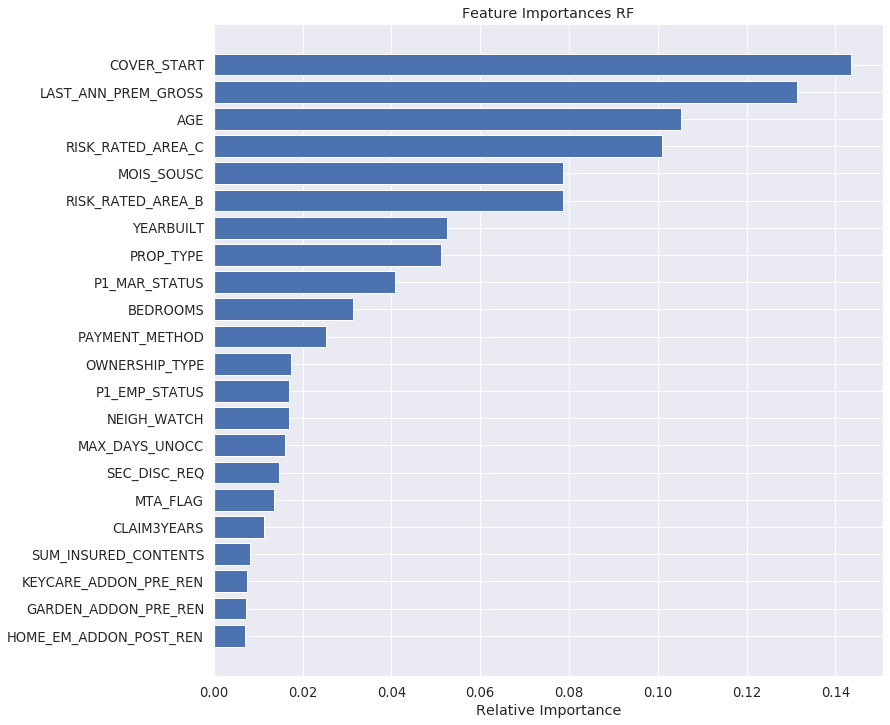

In [164]:
names = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
indices = indices[10:33,]

fig, ax = plt.subplots(figsize=(12,12))

plt.title('Feature Importances RF')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

On va refaire notre modèle mais cette fois ci avec seulement les 12 premières variables les plus importantes selon le modèle.

In [165]:
X = df[[ 'COVER_START', 'LAST_ANN_PREM_GROSS','AGE','MOIS_SOUSC','RISK_RATED_AREA_C','RISK_RATED_AREA_B','YEARBUILT', 'BEDROOMS','P1_MAR_STATUS', 'PAYMENT_METHOD', 'MAX_DAYS_UNOCC','OWNERSHIP_TYPE','NEIGH_WATCH']]
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [189]:
#C'est reparti...
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))


1.0
0.7221281638872429
le f1 score est
0.36533255993812835


In [210]:
print('le f1 score est')
y_clf = clf.predict(X_test)
print(f1_score(y_test,y_clf, average=None) )

le f1 score est
[0.82212528 0.36533256]


In [202]:
#On va tenter avec une validation croisée :)
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline



models = [ ("rf", RandomForestClassifier())]
grids = { "rf" :{"rf__n_estimators":[300,700]}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor'), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X_train, y_train)
    print('Results for {}'.format(name))
    print(clf.cv_results_)
    print('Returned hyperparameter: {}'.format(clf.best_params_))
    print('Best classification accuracy in train is: {}'.format(clf.best_score_))
    print('Classification accuracy on test is: {}'.format(clf.score(X, y)))

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'r' (type <class 'str'>) doesn't

# Modèle XGBOOST

In [168]:
# On y va pour un premier essai
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.7255296184207741
0.720879539490392


On va jouer un  peu avec le paramétrage. Je vous présente ma super fonction "paramétrage de xgboost". Grace à elle vous pouvez tester tous les paramètres que vous souhaitez et elle vous ressort la meilleure combinaison en terme de score. Mais attention au temps !

In [133]:
def xgb_model_select(X_train, Y_train):  
    print ('Select Model...')
    start_time  = datetime.datetime.now()
    xgb_clf =  XGBClassifier()
    parameters = {'n_estimators': [300,700], 'max_depth':[3,15],'subsample' : [0.5, 0.8],'learning_rate': [0.02,0.08]}
    grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=ShuffleSplit(n_splits=10, test_size=0.25), n_jobs=-1)
    print("parameters:")
    print(parameters)
    grid_search_xgb.fit(X_train, Y_train)
    print("Best score: %0.3f" % grid_search_xgb.best_score_)
    print("Best parameters set:")
    best_parameters=grid_search_xgb.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    end_time = datetime.datetime.now()
    print ('Select Done..., Time Cost: %d' % ((end_time - start_time).seconds) )
    return best_parameters, grid_search_xgb


In [152]:
a,b =  xgb_model_select(X_train_norm, y_train)

Select Model...
parameters:
{'n_estimators': [300, 700], 'max_depth': [3, 15], 'subsample': [0.5, 0.8], 'learning_rate': [0.02, 0.08]}
Best score: 0.734
Best parameters set:
	learning_rate: 0.02
	max_depth: 15
	n_estimators: 300
	subsample: 0.8
Select Done..., Time Cost: 1467


Du coup notre meilleur paramétrage est mis ci dessus et on a un score d'apprentissage de 0.73

In [173]:
# XGboost :
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.02,max_depth= 15,n_estimators= 300,subsample= 0.8 )
xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.8629305905342392
0.7234826039109455


In [204]:
print('le f1 score est')
y_xgb = xgb.predict(X_test)
print(f1_score(y_test,y_xgb, average=None))

le f1 score est
[0.82196485 0.38116889]


# SVM

In [175]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

/soft/conda/3/envs/dsa_dtg/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9988148398975683
0.6953356471683738


In [205]:
print('le f1 score est')
y_svc = svc.predict(X_test)
print(f1_score(y_test,y_svc, average=None))

le f1 score est
[0.82018935 0.00318515]


# Réseaux de neurones

In [180]:
model_soft = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[13]),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_soft.compile(
  optimizer='adam',
  loss="categorical_crossentropy",
  metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [181]:
history_soft = model_soft.fit(X_train,tf.keras.utils.to_categorical(y_train), epochs=10, batch_size=128, validation_split=0.2)
model_soft.evaluate(X_test, tf.keras.utils.to_categorical(y_test))

Train on 113402 samples, validate on 28351 samples
Epoch 1/10
113402/113402 [==============================] - 7s 60us/sample - loss: 24.2151 - categorical_accuracy: 0.6130 - val_loss: 0.6187 - val_categorical_accuracy: 0.6988
Epoch 2/10
113402/113402 [==============================] - 5s 41us/sample - loss: 0.8171 - categorical_accuracy: 0.6900 - val_loss: 0.6110 - val_categorical_accuracy: 0.7000
Epoch 3/10
113402/113402 [==============================] - 6s 50us/sample - loss: 0.6518 - categorical_accuracy: 0.6974 - val_loss: 0.6110 - val_categorical_accuracy: 0.7000
Epoch 4/10
113402/113402 [==============================] - 5s 45us/sample - loss: 0.6288 - categorical_accuracy: 0.6985 - val_loss: 0.6111 - val_categorical_accuracy: 0.7000
Epoch 5/10
113402/113402 [==============================] - 5s 48us/sample - loss: 0.6196 - categorical_accuracy: 0.6990 - val_loss: 0.6111 - val_categorical_accuracy: 0.7000
Epoch 6/10
113402/113402 [==============================] - 5s 47us/sampl

[0.6143426184709536, 0.69550496]

In [192]:
y_pred_nn = model_soft.predict(X_test)
y_pred_nn[0]

array([0.69982487, 0.30017516], dtype=float32)

In [193]:
from numpy import argmax
yhat_nn = np.argmax(y_pred_nn, axis=1)
yhat_nn

array([0, 0, 0, ..., 0, 0, 0])

In [206]:
print('le f1 score est')
print(f1_score(y_test,yhat_nn, average=None))

le f1 score est
[0.8204104 0.       ]


/soft/conda/3/envs/dsa_dtg/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [198]:
#Modèle pas du tout intéressant car ne prédit que des zeros
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat_nn)


array([[32864,     0],
       [14388,     0]])

# Regression Logistique

In [207]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
print(lg.score(X_train,y_train))
print(lg.score(X_test,y_test))
print('le f1 score est')
y_lg = lg.predict(X_test)
print(f1_score(y_test,y_lg,))

/soft/conda/3/envs/dsa_dtg/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7036747017699801
0.6989333784813341
le f1 score est
[0.81537623 0.18475645]
